In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


In [2]:
def plot_well_logs(df, well, lithology_col, colors,lithology,dz=100,figsize=(9,12)):
    fig, axes = plt.subplots(1, 5, figsize=figsize)

    # Definindo o limite vertical e adicionando grade
    for ax in axes:
        ax.set_ylim(df[df.WELL == well].DEPTH_MD.max() + dz, df[df.WELL == well].DEPTH_MD.min() - dz)
        ax.grid()

    # Primeiro gráfico: GR com CALI
    axes[0].plot(df[df.WELL == well].GR, df[df.WELL == well].DEPTH_MD, color='blue', lw=0.8, label='GR')
    ax0 = axes[0].twiny()
    ax0.plot(df[df.WELL == well].CALI, df[df.WELL == well].DEPTH_MD, c='r', ls='--', lw=0.8, label='CALI')
    ax0.legend(loc='upper left', fontsize=8)

    # Segundo gráfico: RDEP e RMED
    axes[1].plot(df[df.WELL == well].RDEP, df[df.WELL == well].DEPTH_MD, color='blue', lw=0.8, label='RILD')
    axes[1].plot(df[df.WELL == well].RMED, df[df.WELL == well].DEPTH_MD, color='red', lw=0.8, label='RILM', ls='--')
    axes[1].set_xscale('log')

    # Terceiro gráfico: DTC
    axes[2].plot(df[df.WELL == well].DTC, df[df.WELL == well].DEPTH_MD, color='blue', lw=0.8, label='DTC')

    # Quarto gráfico: RHOB com NPHI
    axes[3].plot(df[df.WELL == well].RHOB, df[df.WELL == well].DEPTH_MD, color='blue', lw=0.8, label='RHOB')
    ax3 = axes[3].twiny()
    ax3.plot(df[df.WELL == well].NPHI, df[df.WELL == well].DEPTH_MD, color='red', lw=0.8, label='NPHI', ls='--')


    for i,j in zip(lithology,colors):

        axes[4].fill_betweenx(df[df.WELL == well].DEPTH_MD, 0,
                           1,
                           where=(df[df.WELL == well][lithology_col] == i),
                           color=j, alpha=1,label=i)

    # Adicionando legendas em todos os gráficos
    for ax in axes:
        ax.legend(fontsize=8, loc='upper right')

    axes[4].legend(fontsize=5)

    # Ajustando o layout para evitar sobreposição
    fig.tight_layout()

    return fig, axes

#=========================================================================================================================#

def plot_well_logs_comparison_cluster(df, well,lithology_col,predicted_col,colors,lithology,dz=100,figsize=(11,12)):
    fig, axes = plt.subplots(1, 6, figsize=figsize)

    # Definindo o limite vertical e adicionando grade
    for ax in axes:
        ax.set_ylim(df[df.WELL == well].DEPTH_MD.max() + dz, df[df.WELL == well].DEPTH_MD.min() - dz)
        ax.grid()

    # Primeiro gráfico: GR com CALI
    axes[0].plot(df[df.WELL == well].GR, df[df.WELL == well].DEPTH_MD, color='blue', lw=0.8, label='GR')
    ax0 = axes[0].twiny()
    ax0.plot(df[df.WELL == well].CALI, df[df.WELL == well].DEPTH_MD, c='r', ls='--', lw=0.8, label='CALI')
    ax0.legend(loc='upper left', fontsize=8)

    # Segundo gráfico: RDEP e RMED
    axes[1].plot(df[df.WELL == well].RDEP, df[df.WELL == well].DEPTH_MD, color='blue', lw=0.8, label='RILD')
    axes[1].plot(df[df.WELL == well].RMED, df[df.WELL == well].DEPTH_MD, color='red', lw=0.8, label='RILM', ls='--')
    axes[1].set_xscale('log')

    # Terceiro gráfico: DTC
    axes[2].plot(df[df.WELL == well].DTC, df[df.WELL == well].DEPTH_MD, color='blue', lw=0.8, label='DTC')

    # Quarto gráfico: RHOB com NPHI
    axes[3].plot(df[df.WELL == well].RHOB, df[df.WELL == well].DEPTH_MD, color='blue', lw=0.8, label='RHOB')
    ax3 = axes[3].twiny()
    ax3.plot(df[df.WELL == well].NPHI, df[df.WELL == well].DEPTH_MD, color='red', lw=0.8, label='NPHI', ls='--')


    for i,j in zip(lithology,colors):

        axes[4].fill_betweenx(df[df.WELL == well].DEPTH_MD, 0,
                           1,
                           where=(df[df.WELL == well][lithology_col] == i),
                           color=j, alpha=1,label=i)

    for i,j in zip(df[df.WELL == well][predicted_col].unique(),colors):

        axes[5].fill_betweenx(df[df.WELL == well].DEPTH_MD, 0,
                           1,
                           where=(df[df.WELL == well][predicted_col]== i),
                           color=j, alpha=1,label=i)

    # Adicionando legendas em todos os gráficos
    for ax in axes:
        ax.legend(fontsize=8, loc='upper right')

    axes[4].legend(fontsize=5)
    axes[5].legend(fontsize=5)

    # Ajustando o layout para evitar sobreposição
    fig.tight_layout()

    return fig, axes


In [3]:
colors = [
    "#fcf444",  # light yellow/pastel yellow
    "#84fc04",  # lime green / neon green
    "#84b4b4",  # blue-green
    "#340cfc",  # deep blue / electric blue
    "#046ccc",  # cyan blue
    "#c0fcfc",  # light cyan
    "#88fcfc",  # very light cyan / soft turquoise
    "#6cb4cc",  # light sky blue / light cerulean blue
    "#dc1cfc",  # bright magenta / electric purple
    "#1005bc",  # deep blue
    "#dedede",  # light gray
    "#fc0c34"   # gainsboro
]

lithology = [
    "Sandstone (Arenito)",
    "Sandstone/Shale (Arenito)",
    "Shale (Argilito)",
    "Marl (Marga)",
    "Dolomite (Dolomita)",
    "Limestone (Calcário)",
    "Chalk (Giz)",
    "Halite (Halita)",
    "Anhydrite (Anidrita)",
    "Tuff (Tufo)",
    "Coal (Carvão)",
    "Basement (Substrato)"
]

In [6]:
#Carregando conjunto de dados
dataset = pd.read_csv('/content/drive/MyDrive/train_dataset_proc.csv')
dataset.head()

,Unnamed: 0,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,GROUP,GROUP_num,LITHOLOGY,RMED_log,RDEP_log
0,4238,15/9-13,1138.704,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,147.837677,30000,NORDLAND GP.,6,Sandstone (Arenito),0.005742,0.038023
1,4239,15/9-13,1138.856,18.613674,1.088184,1.122706,1.800986,60.929138,0.800262,142.382431,65000,NORDLAND GP.,6,Shale (Argilito),0.036703,0.050266
2,4240,15/9-13,1139.008,18.212072,1.127155,1.148141,1.817696,62.117264,0.765957,138.258331,65000,NORDLAND GP.,6,Shale (Argilito),0.051984,0.059995
3,4241,15/9-13,1139.160,18.134182,1.141467,1.170984,1.829333,61.010860,0.702521,139.198914,65000,NORDLAND GP.,6,Shale (Argilito),0.057463,0.068551
4,4242,15/9-13,1139.312,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,144.290085,65000,NORDLAND GP.,6,Shale (Argilito),0.056145,0.073381


interactive(children=(Dropdown(description='well', options=('15/9-13', '15/9-15', '15/9-17', '16/10-1', '16/10…

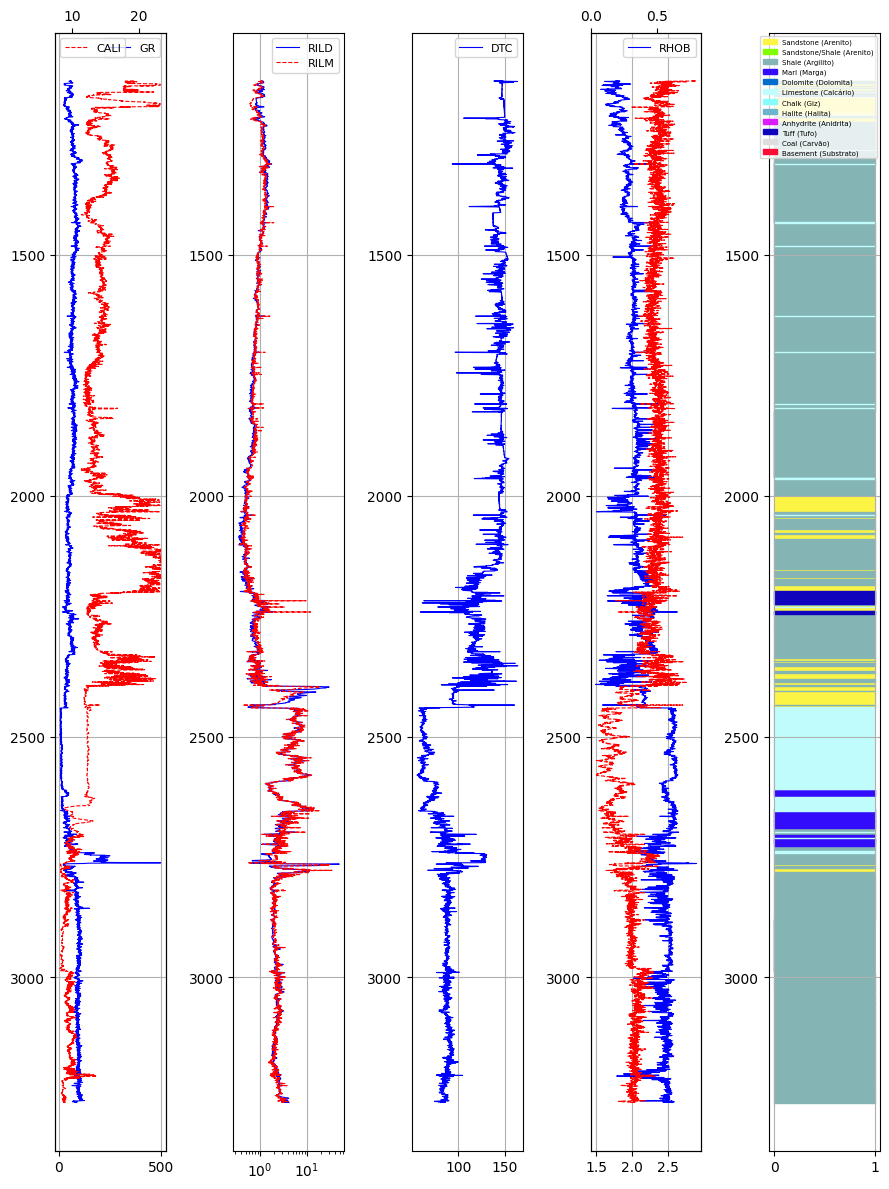

In [7]:
#Plotando perfis de poços
@interact(well=dataset.WELL.unique())
def update_well_plot(well):
    plot_well_logs(dataset, well=well,lithology_col='LITHOLOGY',colors=colors,lithology=lithology,dz=100)

In [8]:
dataset.columns

Index(['Unnamed: 0', 'WELL', 'DEPTH_MD', 'CALI', 'RMED', 'RDEP', 'RHOB', 'GR',
       'NPHI', 'DTC', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'GROUP', 'GROUP_num',
       'LITHOLOGY', 'RMED_log', 'RDEP_log'],
      dtype='object')

In [9]:
#Selecionando colunas para realizar a clusterização dos dados
cols = ['GROUP_num', 'RHOB','GR', 'NPHI', 'DTC', 'RDEP_log','RMED_log']
X = dataset[dataset.WELL=='15/9-13']

In [10]:
X.head()

,Unnamed: 0,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,GROUP,GROUP_num,LITHOLOGY,RMED_log,RDEP_log
0,4238,15/9-13,1138.704,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,147.837677,30000,NORDLAND GP.,6,Sandstone (Arenito),0.005742,0.038023
1,4239,15/9-13,1138.856,18.613674,1.088184,1.122706,1.800986,60.929138,0.800262,142.382431,65000,NORDLAND GP.,6,Shale (Argilito),0.036703,0.050266
2,4240,15/9-13,1139.008,18.212072,1.127155,1.148141,1.817696,62.117264,0.765957,138.258331,65000,NORDLAND GP.,6,Shale (Argilito),0.051984,0.059995
3,4241,15/9-13,1139.160,18.134182,1.141467,1.170984,1.829333,61.010860,0.702521,139.198914,65000,NORDLAND GP.,6,Shale (Argilito),0.057463,0.068551
4,4242,15/9-13,1139.312,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,144.290085,65000,NORDLAND GP.,6,Shale (Argilito),0.056145,0.073381


In [11]:
#Objeto para normalização dos dados
scaler = StandardScaler()

In [12]:
km = KMeans(n_clusters=4)
km.fit(scaler.fit_transform(X[cols]))

X['km_label'] = km.labels_

<ipython-input-12-d88990d0990b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['km_label'] = km.labels_


(<Figure size 1100x1200 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       dtype=object))

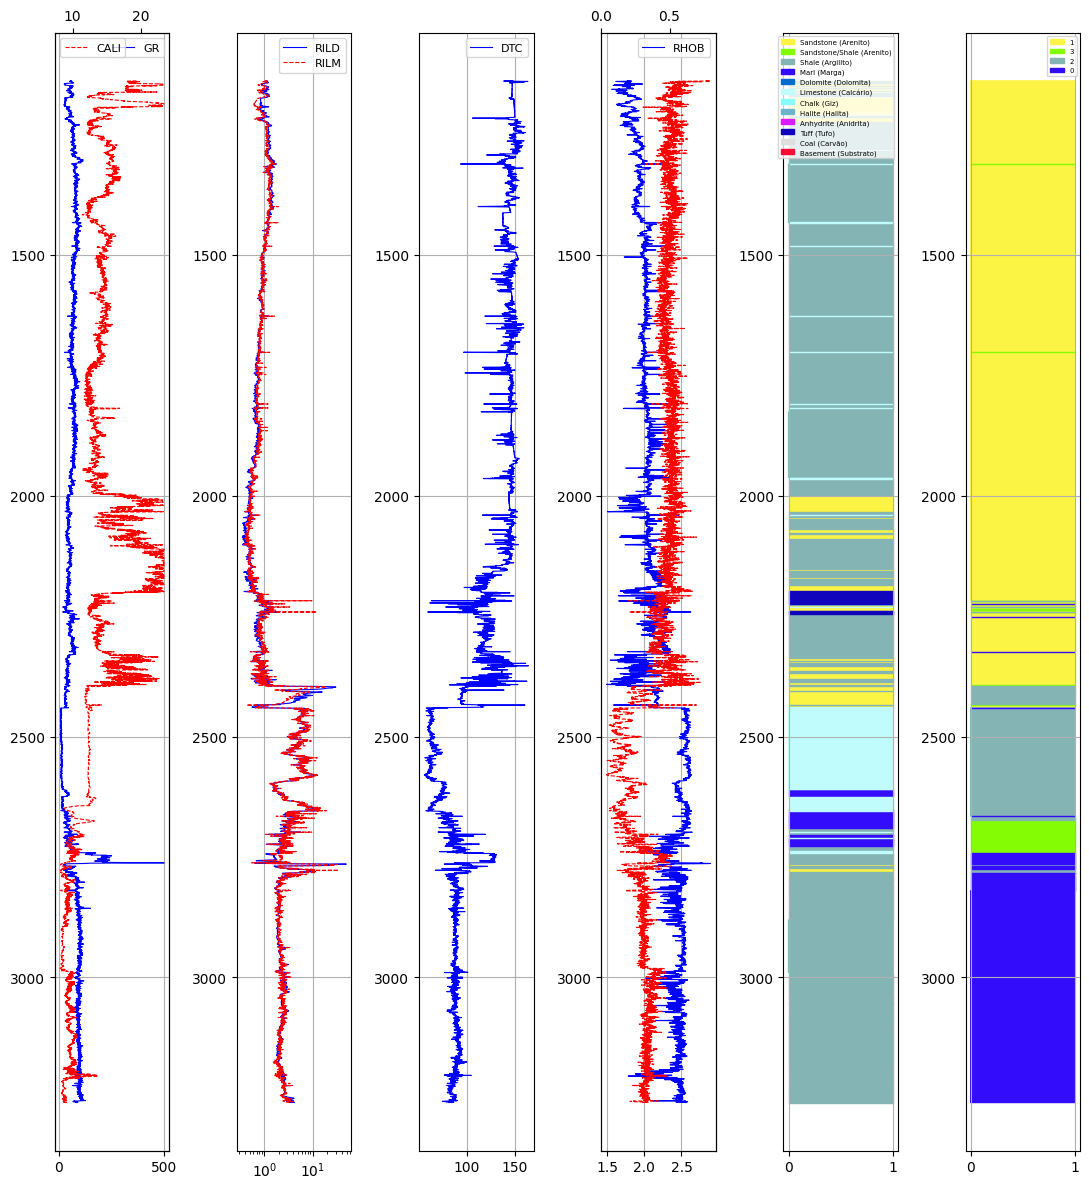

In [13]:
plot_well_logs_comparison_cluster(X, well=X.WELL.unique()[0],lithology_col='LITHOLOGY',colors=colors,lithology=lithology,predicted_col='km_label',dz=100)

In [14]:
#Calculando o coeficiente de silhueta para diferentes números de clusters
sil = []
var_intra_cluster = []
db_score = []

for i in range(2, 13):
    km = KMeans(n_clusters=i,n_init='auto')
    km.fit(scaler.fit_transform(X[cols]))
    sil.append(silhouette_score(X[cols], km.labels_))
    db_score.append(davies_bouldin_score(scaler.fit_transform(X[cols]), km.labels_))
    var_intra_cluster.append(km.inertia_)

Text(0, 0.5, 'índice de Davies-Bouldin')

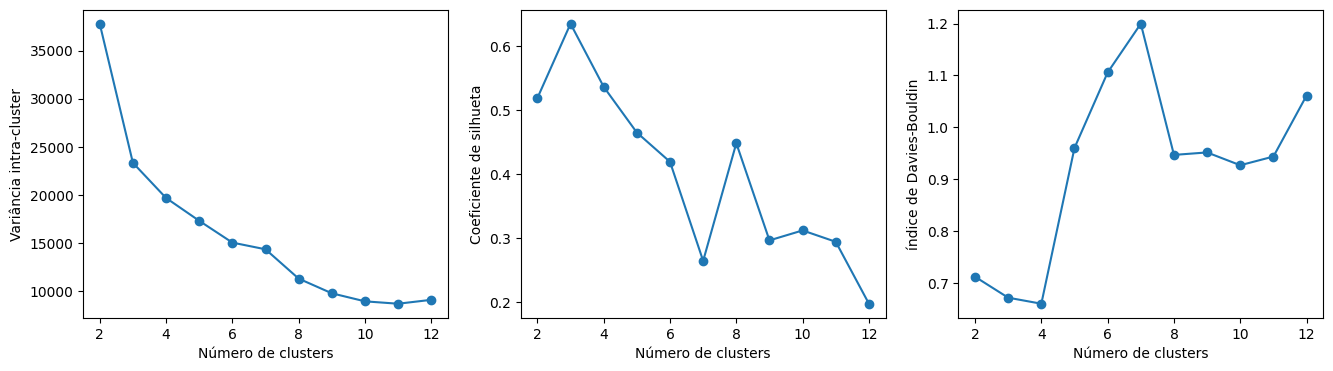

In [15]:
fig, axes = plt.subplots(ncols=3,figsize=(16, 4))

#Plotando o gráfico elbow
axes[0].plot((np.arange(2,13)),var_intra_cluster,marker='o')
axes[0].set_xlabel('Número de clusters')
axes[0].set_ylabel('Variância intra-cluster')


#Plotando os valores do índice de silhueta
axes[1].plot(np.arange(2,13),sil,marker='o')
axes[1].set_xlabel('Número de clusters')
axes[1].set_ylabel('Coeficiente de silhueta')

#Plotando o índice de Davies-Bouldin

axes[2].plot((np.arange(2,13)),db_score,marker='o')
axes[2].set_xlabel('Número de clusters')
axes[2].set_ylabel('índice de Davies-Bouldin')


In [18]:
#Realizando a clusterização com 8 clusters
km = KMeans(n_clusters=8)
km.fit(scaler.fit_transform(X[cols]))

X['km_label_8'] = km.labels_

<ipython-input-18-b8a8eece9b63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['km_label_8'] = km.labels_


(<Figure size 1100x1200 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       dtype=object))

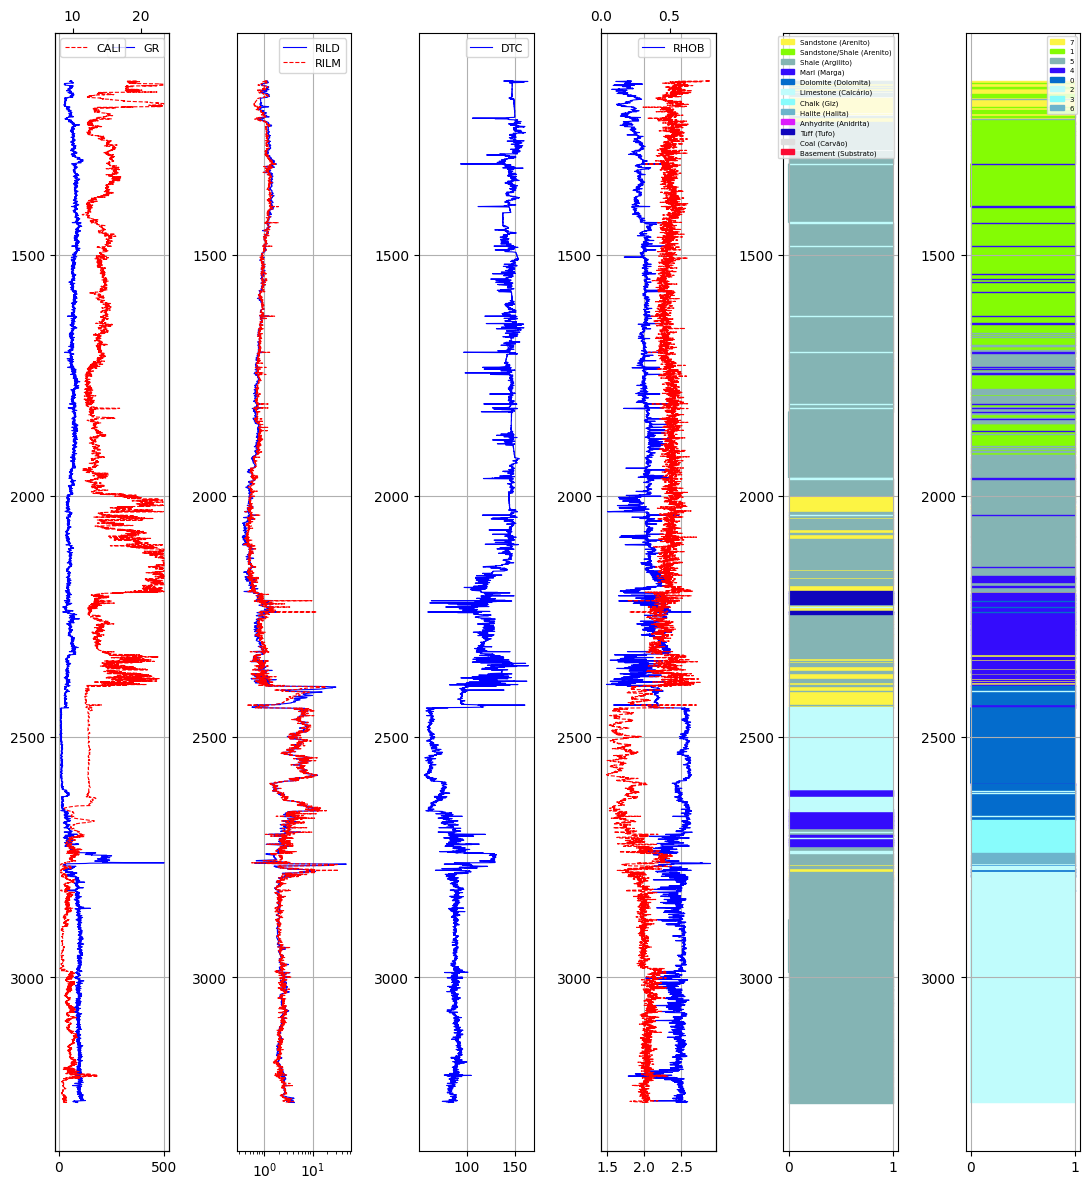

In [19]:
plot_well_logs_comparison_cluster(X, well=X.WELL.unique()[0],lithology_col='LITHOLOGY',colors=colors,lithology=lithology,predicted_col='km_label_8',dz=100)